# Network and Sentiment Analysis of Tweets (Cavaliers vs. Warriors NBA Final 2018)




---


Through this project, we intend to perform network analysis and sentiment analysis on the tweets (textual data). We aim to perform lexical analysis to evaluate the emotions in each tweet, along with generating networks to investigate the social structure through the use of graph theory. While the sentiment analysis will help us understand the sentiments (both positive and negative) and also explore the specific emotions of the audience, the network analysis helps us in generating and visualizing the retweet network graph from the captured tweets. Both sentiment analysis and network analysis have proven to be very useful in decision-making. These analyses will make it easy for anyone of interest to study and determine the support each team gets and also likely to get in the future as the events progress. 

**Importing libraries**

In [32]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

**Reading data**

In [33]:
df = pd.read_csv(r'../data/TweetsNBA.csv', encoding = "ISO-8859-1");

In [34]:
df.shape

(51425, 44)

In [35]:
df.head()

,Unnamed: 0,text,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,...,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
0,1,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,1004531741216989191,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Ja comecou e eu no onibus https://t.co/wPgRLw...,0,0,False,False,1004531741422481409,NaN,"<a href=""http://twitter.com/download/android"" ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/NBA/status/100447552030887...,https://t.co/wPgRLwdg1O
2,3,lets go Cavs\r\n#WhateverItTakes \r\n#NBAFinals,0,0,False,False,1004531741954981888,NaN,"<a href=""http://twitter.com/download/android"" ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0,0,False,False,1004531743410573312,NaN,"<a href=""http://twitter.com/download/android"" ...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RT @NBA: Count down @StephenCurry30's TOP 5 t...,0,0,False,False,1004531743272194048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.describe()

,Unnamed: 0,retweet_count,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,listed_count,user_id_str,statuses_count,followers_count,favourites_count,time_zone,utc_offset,friends_count,place_lat,place_lon,lat,lon
count,51425.000000,51425.0,51425.0,5.142500e+04,4.580000e+02,1.058000e+03,51425.000000,5.142500e+04,5.142500e+04,5.142500e+04,5.142500e+04,0.0,0.0,51425.000000,1664.000000,1664.000000,11.000000,11.000000
mean,25713.000000,0.0,0.0,1.004537e+18,1.002068e+18,8.284585e+16,53.655226,1.846986e+17,2.714620e+04,1.527766e+04,1.132881e+04,NaN,NaN,867.862440,26.847371,-55.789350,25.812217,-70.779955
std,14845.263133,0.0,0.0,3.190923e+12,4.681573e+16,2.529026e+17,779.539123,3.587420e+17,6.439230e+04,4.109777e+05,2.915622e+04,NaN,NaN,5460.407658,22.416988,62.855413,17.936799,65.927399
min,1.000000,0.0,0.0,1.004532e+18,5.153016e+15,2.461030e+05,0.000000,3.629000e+03,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,-39.290459,-157.937058,-23.560609,-122.310000
25%,12857.000000,0.0,0.0,1.004534e+18,1.004532e+18,2.308340e+07,0.000000,2.804389e+08,2.178000e+03,1.480000e+02,7.510000e+02,NaN,NaN,194.000000,23.895049,-89.191620,24.660820,-91.068260
50%,25713.000000,0.0,0.0,1.004536e+18,1.004535e+18,1.159812e+08,2.000000,1.109339e+09,8.516000e+03,3.650000e+02,3.240000e+03,NaN,NaN,385.000000,35.466283,-79.980689,35.174000,-89.857100
75%,38569.000000,0.0,0.0,1.004539e+18,1.004538e+18,1.601172e+09,10.000000,3.584163e+09,2.651700e+04,8.510000e+02,1.067700e+04,NaN,NaN,771.000000,40.816418,-46.595546,35.174000,-89.857100
max,51425.000000,0.0,0.0,1.004543e+18,1.004543e+18,1.004527e+18,48677.000000,1.004542e+18,2.748293e+06,2.781457e+07,1.036221e+06,NaN,NaN,742559.000000,64.893057,153.369361,37.550000,120.989695


**Exploratory Data Analysis (EDA)**

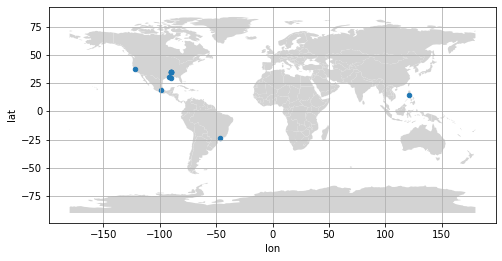

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)

df.plot(x="lon", y="lat", kind="scatter", colormap="YlOrRd",ax=ax)

ax.grid()
plt.show()

**Network analysis**